<a href="https://colab.research.google.com/github/Micherojas/Telecom-X-Parte-2/blob/main/telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Telecom X – Parte 2: Predicción de Cancelación (Churn)

##Importar datos


In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('/content/datos_transformados.csv')

In [ ]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


##Tratamiento de los datos


In [ ]:
datos = datos.drop(['customerid','Total', 'Cuentas_Diarias'], axis=1)

In [ ]:
datos.columns

Index(['churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod', 'Monthly'],
      dtype='object')

##Encoding


Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder

In [ ]:
datos.head()

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,Monthly
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9


In [ ]:
datos['churn'] = datos['churn'].replace({'No':0,'Yes':1}).fillna(0).astype(int)
datos['customer_partner'] = datos['customer_partner'].replace({'No':0,'Yes':1}).fillna(0).astype(int)
datos['customer_dependents'] = datos['customer_dependents'].replace({'No':0,'Yes':1}).fillna(0).astype(int)
datos['phone_phoneservice'] = datos['phone_phoneservice'].replace({'No':0,'Yes':1}).fillna(0).astype(int)
datos['phone_multiplelines'] = datos['phone_multiplelines'].replace({'No':0,'Yes':1, 'No phone service': 0}).fillna(0).astype(int)
datos['internet_onlinesecurity'] = datos['internet_onlinesecurity'].replace({'No':0,'Yes':1, 'No internet service': 0}).fillna(0).astype(int)
datos['internet_onlinebackup'] = datos['internet_onlinebackup'].replace({'No':0,'Yes':1, 'No internet service': 0}).fillna(0).astype(int)
datos['internet_deviceprotection'] = datos['internet_deviceprotection'].replace({'No':0,'Yes':1, 'No internet service': 0}).fillna(0).astype(int)
datos['internet_techsupport'] = datos['internet_techsupport'].replace({'No':0,'Yes':1, 'No internet service': 0}).fillna(0).astype(int)
datos['internet_streamingtv'] = datos['internet_streamingtv'].replace({'No':0,'Yes':1, 'No internet service': 0}).fillna(0).astype(int)
datos['internet_streamingmovies'] = datos['internet_streamingmovies'].replace({'No':0,'Yes':1, 'No internet service': 0}).fillna(0).astype(int)
datos['account_paperlessbilling'] = datos['account_paperlessbilling'].replace({'No':0,'Yes':1}).fillna(0).astype(int)

datos.head()

/tmp/ipython-input-1489741205.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['churn'] = datos['churn'].replace({'No':0,'Yes':1}).fillna(0).astype(int)
/tmp/ipython-input-1489741205.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['customer_partner'] = datos['customer_partner'].replace({'No':0,'Yes':1}).fillna(0).astype(int)
/tmp/ipython-input-1489741205.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resul

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,Monthly
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9


In [ ]:
categoricas = datos.select_dtypes(include='object').columns

In [ ]:
datos_codificados = pd.get_dummies(datos, columns=categoricas, dtype=int)
datos_codificados.head()

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,...,internet_internetservice_DSL,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_Month-to-month,account_contract_One year,account_contract_Two year,account_paymentmethod_Bank transfer (automatic),account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


##Verificación de la Proporción de Cancelación (Churn)


In [ ]:
datos_codificados['churn'].value_counts()

,count
churn,
0,5398
1,1869


In [ ]:
datos_codificados['churn'].value_counts(normalize=True) * 100


,proportion
churn,
0,74.280996
1,25.719004


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

This bar plot shows the number of customers who churned (Yes) and those who did not churn (No). This helps visualize the class distribution of the target variable.

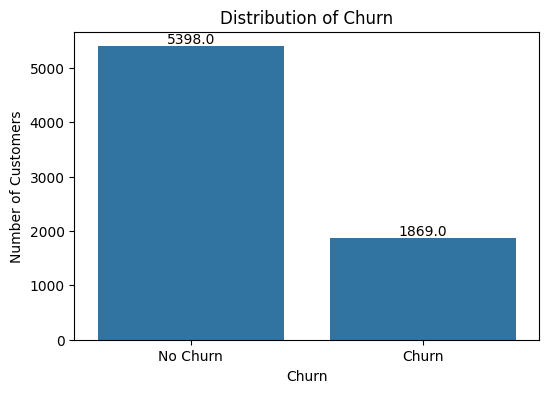

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='churn', data=datos)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##Normalización o Estandarización (si es necesario)


##Análisis de Correlación

In [ ]:
corr['churn'].sort_values(ascending=False)

,churn
churn,1.000000
account_contract_Month-to-month,0.395584
internet_internetservice_Fiber optic,0.300949
account_paymentmethod_Electronic check,0.294626
Monthly,0.189866
account_paperlessbilling,0.186666
customer_seniorcitizen,0.146733
internet_streamingtv,0.062430
internet_streamingmovies,0.060586
phone_multiplelines,0.039343


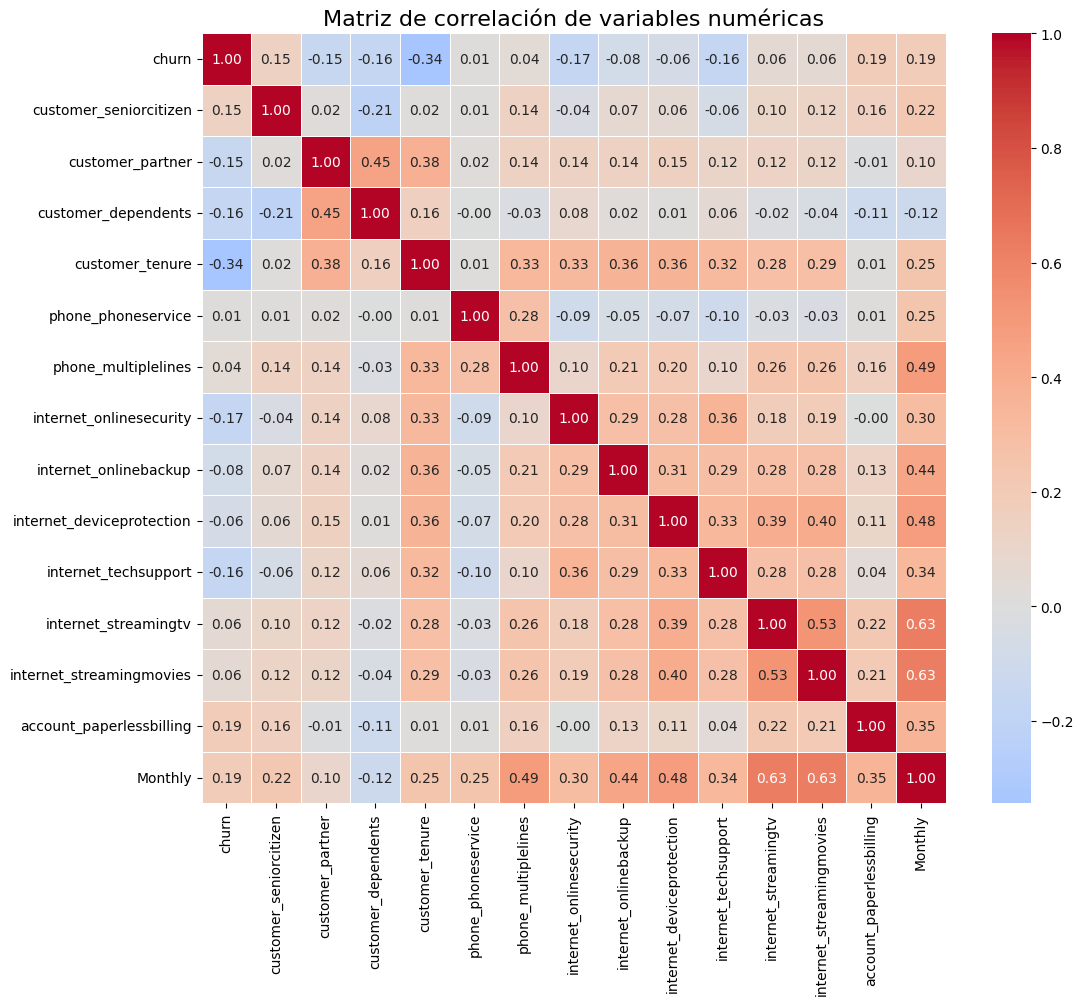

In [ ]:
# Calcular correlación solo de variables numéricas
df_num = datos.select_dtypes(include=['int64','float64'])
corr = df_num.corr()

# Crear figura más grande
plt.figure(figsize=(12,10))

# Heatmap con anotaciones y colores
sns.heatmap(corr,
            annot=True,           # muestra los números
            fmt=".2f",            # 2 decimales
            cmap="coolwarm",      # gradiente azul-rojo
            center=0,             # centrar el color en 0
            linewidths=0.5)       # líneas entre celdas

plt.title("Matriz de correlación de variables numéricas", fontsize=16)
plt.show()

##Análisis Dirigido

/tmp/ipython-input-1942280808.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customer_tenure', data=datos, palette='Set3')


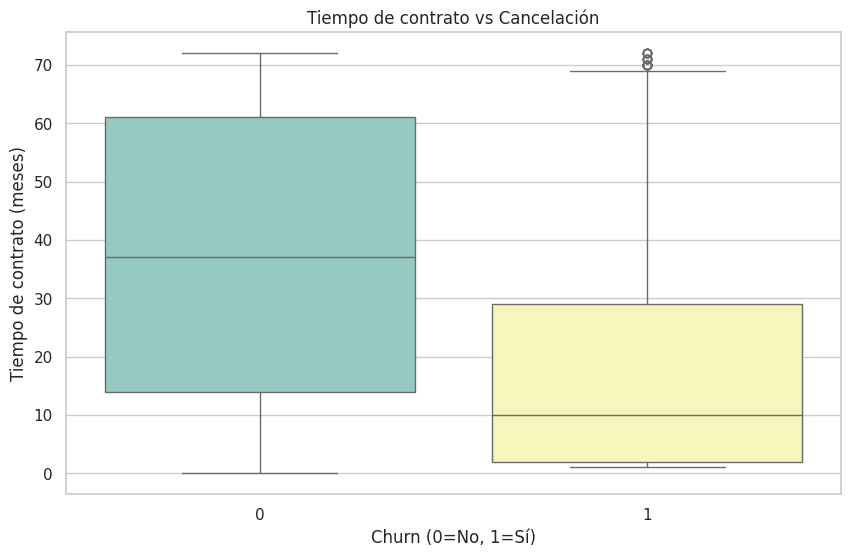

In [ ]:
# Configuración general de Seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 2️⃣ Boxplot: Tiempo de contrato vs Churn
plt.figure()
sns.boxplot(x='churn', y='customer_tenure', data=datos, palette='Set3')
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

/tmp/ipython-input-2762203359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='Monthly', data=datos_codificados, palette='Set3')


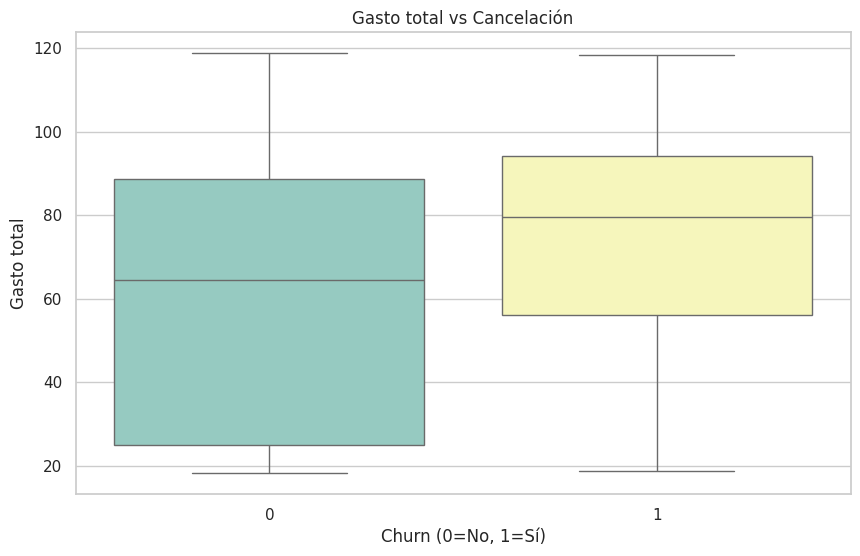

In [ ]:
# 3️⃣ Boxplot: Gasto total vs Churn
plt.figure()
sns.boxplot(x='churn', y='Monthly', data=datos_codificados, palette='Set3')
plt.title("Gasto total vs Cancelación")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Gasto total")
plt.show()

##Separación de Datos

In [ ]:
from sklearn.model_selection import train_test_split

X = datos_codificados.drop(['churn'],axis=1)
y = datos_codificados['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


##Creación de Modelos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenar modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.7872535534158643
[[1462  187]
 [ 277  255]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1649
           1       0.58      0.48      0.52       532

    accuracy                           0.79      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.78      0.79      0.78      2181



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Escalar los datos (Z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluación
print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


=== Regresión Logística ===
Accuracy: 0.8110958276020174
[[1488  161]
 [ 251  281]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1649
           1       0.64      0.53      0.58       532

    accuracy                           0.81      2181
   macro avg       0.75      0.72      0.73      2181
weighted avg       0.80      0.81      0.80      2181



Considerando la métrica de accuracy general, la Regresión Logística tuvo un desempeño ligeramente mejor (0.811) en comparación con Random Forest (0.787) en el conjunto de prueba. Además, la Regresión Logística mostró métricas de precisión, recall y f1-score ligeramente superiores para ambas clases.

Los coeficientes de la Regresión Logística indican la magnitud y dirección de la relación entre cada variable predictora y el logaritmo de las probabilidades de la variable objetivo (churn). Un coeficiente positivo grande sugiere que un aumento en el valor de esa variable está asociado con una mayor probabilidad de churn, mientras que un coeficiente negativo grande sugiere una menor probabilidad de churn.

In [ ]:
# Obtener los coeficientes del modelo de Regresión Logística
coeficientes = log_reg.coef_[0]

# Obtener los nombres de las características
nombres_caracteristicas = X_train.columns

# Crear un DataFrame para visualizar los coeficientes
df_coeficientes = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Coeficiente': coeficientes})

# Ordenar los coeficientes por su valor absoluto para ver las variables más relevantes
df_coeficientes['Abs_Coeficiente'] = abs(df_coeficientes['Coeficiente'])
df_coeficientes = df_coeficientes.sort_values(by='Abs_Coeficiente', ascending=False)

# Mostrar las variables más relevantes
print("Variables más relevantes (según coeficientes de Regresión Logística):")
display(df_coeficientes)

Variables más relevantes (según coeficientes de Regresión Logística):


,Caracteristica,Coeficiente,Abs_Coeficiente
3,customer_tenure,-0.770745,0.770745
18,internet_internetservice_No,-0.334667,0.334667
17,internet_internetservice_Fiber optic,0.303473,0.303473
21,account_contract_Two year,-0.287959,0.287959
19,account_contract_Month-to-month,0.287317,0.287317
9,internet_techsupport,-0.220633,0.220633
13,Monthly,0.194647,0.194647
6,internet_onlinesecurity,-0.176071,0.176071
12,account_paperlessbilling,0.170237,0.170237
4,phone_phoneservice,-0.146214,0.146214


Random Forest models calculate feature importance based on how much each variable contributes to reducing the impurity of the nodes in the decision trees. Features that result in a greater reduction of impurity when used for splitting are considered more important.

In [ ]:
# Obtener la importancia de las variables del modelo Random Forest
importancias = modelo_rf.feature_importances_

# Obtener los nombres de las características
nombres_caracteristicas_rf = X_train.columns

# Crear un DataFrame para visualizar la importancia de las variables
df_importancias = pd.DataFrame({'Caracteristica': nombres_caracteristicas_rf, 'Importancia': importancias})

# Ordenar las variables por importancia de forma descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Mostrar las variables más importantes
print("\nVariables más importantes (según Random Forest):")
display(df_importancias)


Variables más importantes (según Random Forest):


,Caracteristica,Importancia
13,Monthly,0.226724
3,customer_tenure,0.222363
19,account_contract_Month-to-month,0.069454
17,internet_internetservice_Fiber optic,0.036857
12,account_paperlessbilling,0.030674
24,account_paymentmethod_Electronic check,0.029692
1,customer_partner,0.028326
6,internet_onlinesecurity,0.026162
7,internet_onlinebackup,0.025846
9,internet_techsupport,0.025397


##Informe


### Informe Detallado: Factores Clave y Estrategias de Retención para la Cancelación de Clientes

Este informe presenta un resumen de los hallazgos obtenidos a partir del análisis de los datos de clientes de Telecom X, utilizando modelos de predicción de cancelación (Churn). Se han entrenado y evaluado dos modelos: Regresión Logística y Random Forest, y se ha analizado la importancia de las variables para identificar los factores más influyentes en la decisión de un cliente de cancelar el servicio.

**1. Desempeño de los Modelos:**

Se evaluaron dos modelos de clasificación en un conjunto de datos de prueba (30% de los datos totales):

*   **Regresión Logística:**
    *   Accuracy: 0.811
    *   El reporte de clasificación mostró métricas razonables para ambas clases, con una precisión del 86% y recall del 90% para la clase "No Churn" y precisión del 64% y recall del 53% para la clase "Churn".

*   **Random Forest:**
    *   Accuracy: 0.787
    *   El reporte de clasificación mostró un desempeño ligeramente inferior a la Regresión Logística, con una precisión del 84% y recall del 89% para la clase "No Churn" y precisión del 58% y recall del 48% para la clase "Churn".

Basándonos en la métrica de *accuracy* y las métricas del reporte de clasificación en el conjunto de prueba, la **Regresión Logística** demostró un desempeño ligeramente superior para este problema de clasificación.

**2. Factores Clave que Influyen en la Cancelación:**

El análisis de la importancia de las variables en ambos modelos nos permite identificar los factores que tienen un mayor impacto en la probabilidad de que un cliente cancele su servicio:

*   **Según la Regresión Logística (basado en coeficientes):**
    *   **customer\_tenure (Antigüedad del cliente):** Este fue el factor más influyente y con un coeficiente negativo significativo (-0.77). Esto indica que los clientes con mayor antigüedad tienen una **menor probabilidad de cancelar**.
    *   **internet\_internetservice\_No (Sin servicio de internet):** Un coeficiente negativo significativo (-0.33), sugiere que los clientes sin servicio de internet tienen una **menor probabilidad de cancelar**.
    *   **internet\_internetservice\_Fiber optic (Servicio de internet Fibra Óptica):** Un coeficiente positivo significativo (0.30), indica que los clientes con servicio de fibra óptica tienen una **mayor probabilidad de cancelar**.
    *   **account\_contract\_Two year (Contrato de dos años):** Un coeficiente negativo significativo (-0.29), sugiere que los clientes con contratos a largo plazo (dos años) tienen una **menor probabilidad de cancelar**.
    *   **account\_contract\_Month-to-month (Contrato mes a mes):** Un coeficiente positivo significativo (0.29), indica que los clientes con contratos mes a mes tienen una **mayor probabilidad de cancelar**.
    *   Otras variables importantes con coeficientes notables incluyen `internet_techsupport`, `Monthly`, `internet_onlinesecurity`, y `account_paperlessbilling`.

*   **Según Random Forest (basado en importancia de la característica):**
    *   **Monthly (Cargo mensual):** Este fue el factor más importante (0.227), lo que sugiere que el monto del cargo mensual tiene una influencia considerable en la decisión de cancelar.
    *   **customer\_tenure (Antigüedad del cliente):** También identificado como muy importante (0.222) por Random Forest, reafirmando que la antigüedad es un factor clave.
    *   **account\_contract\_Month-to-month (Contrato mes a mes):** Considerado importante (0.069), lo que concuerda con el análisis de Regresión Logística.
    *   **internet\_internetservice\_Fiber optic (Servicio de internet Fibra Óptica):** Identificado como importante (0.037), también alineado con los hallazgos de Regresión Logística.
    *   **account\_paperlessbilling (Facturación electrónica):** Considerado importante (0.031).

**En resumen de los factores clave:**

Ambos modelos coinciden en la importancia de la **antigüedad del cliente** y el **tipo de contrato** (especialmente los contratos mes a mes) como factores cruciales en la predicción de la cancelación. El **cargo mensual** también emerge como un factor muy relevante según el modelo Random Forest. El tipo de servicio de internet, particularmente la **fibra óptica**, parece estar asociado con una mayor probabilidad de cancelación según la Regresión Logística. La **facturación electrónica** también muestra cierta relevancia.

**3. Estrategias de Retención Basadas en los Resultados:**

Basándonos en los factores clave identificados, se proponen las siguientes estrategias de retención:

*   **Fomentar Contratos a Largo Plazo:** Dado que los contratos a dos años están fuertemente asociados con una menor cancelación, se deben ofrecer incentivos atractivos para que los clientes con contratos mes a mes se cambien a planes de mayor duración. Esto podría incluir descuentos en la tarifa mensual, mejoras en el servicio o beneficios adicionales.
*   **Programas de Fidelización para Clientes Antiguos:** La antigüedad del cliente es un predictor fuerte de la no cancelación. Se pueden implementar programas de fidelización para recompensar a los clientes leales, ofreciendo beneficios exclusivos, soporte prioritario o tarifas especiales para mantener su satisfacción y reducir la probabilidad de que consideren irse.
*   **Evaluar la Experiencia del Cliente con Fibra Óptica:** La asociación entre el servicio de fibra óptica y una mayor probabilidad de cancelación sugiere que podría haber problemas específicos con este servicio que están llevando a los clientes a irse. Se debe investigar a fondo la satisfacción de los clientes con fibra óptica, identificar posibles puntos débiles (ej. problemas técnicos, precios, servicio al cliente) y tomar medidas correctivas.
*   **Revisar la Estructura de Cargos Mensuales:** El cargo mensual es un factor importante según Random Forest. Se deben analizar las tarifas actuales y compararlas con la competencia. Considerar la posibilidad de ofrecer planes más flexibles o con precios ajustados para clientes con altos cargos mensuales que muestren riesgo de cancelación.
*   **Optimizar la Experiencia de Facturación:** La facturación electrónica mostró cierta relevancia. Asegurarse de que el proceso de facturación electrónica sea claro, fácil de entender y conveniente para el cliente. Ofrecer opciones de pago sencillas y recordar a los clientes sobre las fechas de vencimiento de manera proactiva.
*   **Soporte Técnico Proactivo:** La importancia de `internet_techsupport` (con coeficiente negativo en Regresión Logística) sugiere que un buen soporte técnico reduce la probabilidad de cancelación. Invertir en mejorar la calidad y disponibilidad del soporte técnico, especialmente para los servicios de internet. Considerar un enfoque proactivo para abordar posibles problemas técnicos antes de que el cliente los experimente.

**Conclusión:**

La cancelación de clientes es un problema complejo influenciado por una combinación de factores. Los modelos de predicción nos han permitido identificar que la **antigüedad del cliente**, el **tipo de contrato**, el **cargo mensual** y aspectos relacionados con el **servicio de internet** son los principales impulsores del churn en este caso. Al enfocarse en estos factores clave e implementar las estrategias de retención propuestas, Telecom X puede mejorar significativamente sus esfuerzos para retener a sus clientes y reducir la tasa de cancelación.